In [3]:
import numpy as np
import pandas as pd

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df=pd.read_csv('/content/drive/MyDrive/project/webmd.csv')

In [6]:
df

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1
...,...,...,...,...,...,...,...,...,...,...,...,...
362801,55-64,Stop Smoking,11/14/2008,chantix,144470,5,5,I took the whole 12 weeks.I could have stopped...,5,Female,"Nausea , headache , vomiting , drowsiness, g...",2
362802,,Other,11/14/2008,chantix,144470,2,3,My dad strated taking Chantix about 1 month ag...,1,,"Nausea , headache , vomiting , drowsiness, g...",16
362803,25-34,Stop Smoking,11/13/2008,chantix,144470,2,4,"As long as I was on chantix, I didn't smoke. ...",2,Female,"Nausea , headache , vomiting , drowsiness, g...",3
362804,55-64,Stop Smoking,11/13/2008,chantix,144470,5,5,Started this medication Oct 5th 2008. Haven't ...,5,Male,"Nausea , headache , vomiting , drowsiness, g...",1


In [7]:
df.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


In [8]:
df.drop_duplicates()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1
...,...,...,...,...,...,...,...,...,...,...,...,...
362801,55-64,Stop Smoking,11/14/2008,chantix,144470,5,5,I took the whole 12 weeks.I could have stopped...,5,Female,"Nausea , headache , vomiting , drowsiness, g...",2
362802,,Other,11/14/2008,chantix,144470,2,3,My dad strated taking Chantix about 1 month ag...,1,,"Nausea , headache , vomiting , drowsiness, g...",16
362803,25-34,Stop Smoking,11/13/2008,chantix,144470,2,4,"As long as I was on chantix, I didn't smoke. ...",2,Female,"Nausea , headache , vomiting , drowsiness, g...",3
362804,55-64,Stop Smoking,11/13/2008,chantix,144470,5,5,Started this medication Oct 5th 2008. Haven't ...,5,Male,"Nausea , headache , vomiting , drowsiness, g...",1


In [9]:
df.isnull().sum()

Age               0
Condition         0
Date              0
Drug              0
DrugId            0
EaseofUse         0
Effectiveness     0
Reviews          37
Satisfaction      0
Sex               0
Sides             0
UsefulCount       0
dtype: int64

In [10]:
df=df.dropna()

In [11]:
df=df.replace(" ",float('NaN'))

In [12]:
df

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,NaN,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,NaN,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
362801,55-64,Stop Smoking,11/14/2008,chantix,144470,5,5,I took the whole 12 weeks.I could have stopped...,5,Female,"Nausea , headache , vomiting , drowsiness, g...",2
362802,NaN,Other,11/14/2008,chantix,144470,2,3,My dad strated taking Chantix about 1 month ag...,1,NaN,"Nausea , headache , vomiting , drowsiness, g...",16
362803,25-34,Stop Smoking,11/13/2008,chantix,144470,2,4,"As long as I was on chantix, I didn't smoke. ...",2,Female,"Nausea , headache , vomiting , drowsiness, g...",3
362804,55-64,Stop Smoking,11/13/2008,chantix,144470,5,5,Started this medication Oct 5th 2008. Haven't ...,5,Male,"Nausea , headache , vomiting , drowsiness, g...",1


In [13]:
df=df.dropna()

In [14]:
df

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
6,25-34,Birth Control,6/15/2017,wymzya fe,163180,5,5,Haven't gotten pregnant so it does it's job. I...,2,Female,"Nausea , vomiting , headache , bloating , ...",0
7,45-54,Disease of Ovaries with Cysts,1/30/2017,wymzya fe,163180,5,5,I have take this for 5 years age 45-50 to prev...,5,Female,"Nausea , vomiting , headache , bloating , ...",0
9,55-64,Stuffy Nose,10/29/2012,"12 hour nasal relief spray, non-aerosol",9800,4,2,The 12 hour spray only works for me for 6 hours.,2,Male,"Temporary burning, stinging, dryness in the no...",0
...,...,...,...,...,...,...,...,...,...,...,...,...
362799,25-34,Stop Smoking,11/16/2008,chantix,144470,2,4,I have tried the patch and quitting cold turke...,4,Female,"Nausea , headache , vomiting , drowsiness, g...",5
362801,55-64,Stop Smoking,11/14/2008,chantix,144470,5,5,I took the whole 12 weeks.I could have stopped...,5,Female,"Nausea , headache , vomiting , drowsiness, g...",2
362803,25-34,Stop Smoking,11/13/2008,chantix,144470,2,4,"As long as I was on chantix, I didn't smoke. ...",2,Female,"Nausea , headache , vomiting , drowsiness, g...",3
362804,55-64,Stop Smoking,11/13/2008,chantix,144470,5,5,Started this medication Oct 5th 2008. Haven't ...,5,Male,"Nausea , headache , vomiting , drowsiness, g...",1


In [15]:
df=df.reset_index()

In [16]:
df

,index,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,6,25-34,Birth Control,6/15/2017,wymzya fe,163180,5,5,Haven't gotten pregnant so it does it's job. I...,2,Female,"Nausea , vomiting , headache , bloating , ...",0
3,7,45-54,Disease of Ovaries with Cysts,1/30/2017,wymzya fe,163180,5,5,I have take this for 5 years age 45-50 to prev...,5,Female,"Nausea , vomiting , headache , bloating , ...",0
4,9,55-64,Stuffy Nose,10/29/2012,"12 hour nasal relief spray, non-aerosol",9800,4,2,The 12 hour spray only works for me for 6 hours.,2,Male,"Temporary burning, stinging, dryness in the no...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
280122,362799,25-34,Stop Smoking,11/16/2008,chantix,144470,2,4,I have tried the patch and quitting cold turke...,4,Female,"Nausea , headache , vomiting , drowsiness, g...",5
280123,362801,55-64,Stop Smoking,11/14/2008,chantix,144470,5,5,I took the whole 12 weeks.I could have stopped...,5,Female,"Nausea , headache , vomiting , drowsiness, g...",2
280124,362803,25-34,Stop Smoking,11/13/2008,chantix,144470,2,4,"As long as I was on chantix, I didn't smoke. ...",2,Female,"Nausea , headache , vomiting , drowsiness, g...",3
280125,362804,55-64,Stop Smoking,11/13/2008,chantix,144470,5,5,Started this medication Oct 5th 2008. Haven't ...,5,Male,"Nausea , headache , vomiting , drowsiness, g...",1


In [17]:
df=df.drop(columns='index')

In [18]:
df

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,25-34,Birth Control,6/15/2017,wymzya fe,163180,5,5,Haven't gotten pregnant so it does it's job. I...,2,Female,"Nausea , vomiting , headache , bloating , ...",0
3,45-54,Disease of Ovaries with Cysts,1/30/2017,wymzya fe,163180,5,5,I have take this for 5 years age 45-50 to prev...,5,Female,"Nausea , vomiting , headache , bloating , ...",0
4,55-64,Stuffy Nose,10/29/2012,"12 hour nasal relief spray, non-aerosol",9800,4,2,The 12 hour spray only works for me for 6 hours.,2,Male,"Temporary burning, stinging, dryness in the no...",0
...,...,...,...,...,...,...,...,...,...,...,...,...
280122,25-34,Stop Smoking,11/16/2008,chantix,144470,2,4,I have tried the patch and quitting cold turke...,4,Female,"Nausea , headache , vomiting , drowsiness, g...",5
280123,55-64,Stop Smoking,11/14/2008,chantix,144470,5,5,I took the whole 12 weeks.I could have stopped...,5,Female,"Nausea , headache , vomiting , drowsiness, g...",2
280124,25-34,Stop Smoking,11/13/2008,chantix,144470,2,4,"As long as I was on chantix, I didn't smoke. ...",2,Female,"Nausea , headache , vomiting , drowsiness, g...",3
280125,55-64,Stop Smoking,11/13/2008,chantix,144470,5,5,Started this medication Oct 5th 2008. Haven't ...,5,Male,"Nausea , headache , vomiting , drowsiness, g...",1


In [19]:
!pip install -U textblob
!python -m textblob.download_corpora
!pip install wordcloud
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
import nltk
from nltk.corpus import stopwords
from nltk import ngrams
from nltk.tokenize import word_tokenize
from textblob import TextBlob, Word, Blobber
import wordcloud
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
!pip install nltk
nltk.download('stopwords')

Requirement already up-to-date: textblob in /usr/local/lib/python3.7/dist-packages (0.15.3)
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [20]:
df1=df['Reviews']

In [21]:
##Converting all review into Lowercase..###
df['Reviews']= df['Reviews'].apply(lambda x: " ".join(word.lower() for word in x.split()))

In [22]:
## removing punctuation from review..#
import string
df['Reviews']=df['Reviews'].apply(lambda x:''.join([i for i in x  if i not in string.punctuation]))

In [23]:
## Remove Numbers from review...##
df['Reviews']=df['Reviews'].str.replace('[0-9]','')

In [24]:
## removing all stopwords(english)....###
from nltk.corpus import stopwords
stop_words=stopwords.words('english')
sw=['one','used','problem','although','even','like','also','still','due','since''however','though']
stop_words.extend(sw)

In [25]:
df['Reviews']=df['Reviews'].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words))

In [26]:
from textblob import Word
df['Reviews']= df['Reviews'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

import re
pattern = r"((?<=^)|(?<= )).((?=$)|(?= ))"
df['Reviews']= df['Reviews'].apply(lambda x:(re.sub(pattern, '',x).strip()))

In [27]:
df.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,im retired physician med tried allergy seasona...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared right throat hurting went away taking ...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,25-34,Birth Control,6/15/2017,wymzya fe,163180,5,5,havent gotten pregnant job switched brand anot...,2,Female,"Nausea , vomiting , headache , bloating , ...",0
3,45-54,Disease of Ovaries with Cysts,1/30/2017,wymzya fe,163180,5,5,take year age prevent ovarian cyst burst stopp...,5,Female,"Nausea , vomiting , headache , bloating , ...",0
4,55-64,Stuffy Nose,10/29/2012,"12 hour nasal relief spray, non-aerosol",9800,4,2,hour spray work hour,2,Male,"Temporary burning, stinging, dryness in the no...",0


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
TFIDF=tfidf.fit_transform(df['Reviews'])
print(TFIDF)

  (0, 28448)	0.2879772315417054
  (0, 130177)	0.3098709172934553
  (0, 3432)	0.19346529319285838
  (0, 144493)	0.13143145429038866
  (0, 38459)	0.13450632894077813
  (0, 136368)	0.20125385775083052
  (0, 13335)	0.24052649323245176
  (0, 49029)	0.15894613561102222
  (0, 40453)	0.21235629976945444
  (0, 112569)	0.3897323324358172
  (0, 4398)	0.28607125409098955
  (0, 132666)	0.20047072945228794
  (0, 77015)	0.1627604183153737
  (0, 97893)	0.30628267632386974
  (0, 109022)	0.39990999637550356
  (0, 62974)	0.15935603081083707
  (1, 77584)	0.2868997977006164
  (1, 125597)	0.18032746829056148
  (1, 11137)	0.3066693118347673
  (1, 140813)	0.285463082595297
  (1, 61351)	0.5062120909603329
  (1, 128895)	0.3967314107391695
  (1, 109716)	0.3233744691026102
  (1, 22499)	0.43751312133960474
  (2, 56911)	0.20669133533971007
  :	:
  (280125, 77264)	0.08728432808566855
  (280125, 53236)	0.09405807799683388
  (280125, 56675)	0.15329009826527307
  (280125, 77015)	0.10446428972847813
  (280126, 20831)	0.

In [29]:
#common word removal
freq1= pd.Series(' '.join(df['Reviews']).split()).value_counts()[:10]
freq1

day           113229
pain           97023
taking         94982
take           84524
drug           75858
side           74433
effect         74321
year           73301
medication     70989
time           64561
dtype: int64

In [30]:
freq = pd.Series(' '.join(df['Reviews']).split()).value_counts()[-10:]
freq

dayovernight             1
tjhose                   1
howeverevery             1
genereally               1
inconvienant             1
symbiax                  1
optionperiod             1
insertedmy               1
fribromyalgaarthritis    1
sulfazalizine            1
dtype: int64

In [31]:
df['Reviews'] = df['Reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['Reviews'].head()

0    im retired physician med tried allergy seasona...
1    cleared right throat hurting went away taking ...
2    havent gotten pregnant job switched brand anot...
3    take year age prevent ovarian cyst burst stopp...
4                                 hour spray work hour
Name: Reviews, dtype: object

In [32]:
df['Reviews'] = df['Reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in freq1))
df['Reviews'].head()

0    im retired physician med tried allergy seasona...
1      cleared right throat hurting went away medicine
2    havent gotten pregnant job switched brand anot...
3           age prevent ovarian cyst burst stopped age
4                                 hour spray work hour
Name: Reviews, dtype: object

In [33]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
df['Reviews'][:10].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0    im retir physician med tri allergi season effe...
1            clear right throat hurt went away medicin
2    havent gotten pregnant job switch brand anoth ...
3              age prevent ovarian cyst burst stop age
4                                 hour spray work hour
5    usual zero littl acn month made breakout horri...
6    lyza birth control worst birth control pill ev...
7    lyza two month anxiou go back pill iud past se...
8    pill littl two month experi horribl dont know ...
9    obgyn place pill risk stroke estrogen birth co...
Name: Reviews, dtype: object

In [34]:
from textblob import Word
df['Reviews'] = df['Reviews'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['Reviews'].head()

0    im retired physician med tried allergy seasona...
1      cleared right throat hurting went away medicine
2    havent gotten pregnant job switched brand anot...
3           age prevent ovarian cyst burst stopped age
4                                 hour spray work hour
Name: Reviews, dtype: object

In [35]:
tf1 = (df['Reviews'][1:10]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1

,words,tf
0,went,1.0
1,right,1.0
2,throat,1.0
3,cleared,1.0
4,hurting,1.0
...,...,...
149,extremely,1.0
150,factor,1.0
151,almost,1.0
152,didnt,1.0


In [36]:
for i,word in enumerate(tf1['words']):
    tf1.loc[i, 'idf'] = np.log(df.shape[0]/(len(df[df['Reviews'].str.contains(word)])))

In [37]:
tf1

,words,tf,idf
0,went,1.0,2.683724
1,right,1.0,3.094350
2,throat,1.0,4.115511
3,cleared,1.0,4.683199
4,hurting,1.0,5.554585
...,...,...,...
149,extremely,1.0,3.725256
150,factor,1.0,5.676065
151,almost,1.0,2.937109
152,didnt,1.0,2.917441


In [38]:
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1

,words,tf,idf,tfidf
0,went,1.0,2.683724,2.683724
1,right,1.0,3.094350,3.094350
2,throat,1.0,4.115511,4.115511
3,cleared,1.0,4.683199,4.683199
4,hurting,1.0,5.554585,5.554585
...,...,...,...,...
149,extremely,1.0,3.725256,3.725256
150,factor,1.0,5.676065,5.676065
151,almost,1.0,2.937109,2.937109
152,didnt,1.0,2.917441,2.917441


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
data_vect = tfidf.fit_transform(df['Reviews'])

data_vect

<280127x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 4149094 stored elements in Compressed Sparse Row format>

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")
data_bow = bow.fit_transform(df['Reviews'])
data_bow

<280127x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 4894785 stored elements in Compressed Sparse Row format>

In [41]:
df['Reviews'][:10].apply(lambda x: TextBlob(x).sentiment)

0      (0.2833333333333333, 0.5111111111111111)
1      (0.2857142857142857, 0.5357142857142857)
2                 (-0.00416666666666668, 0.425)
3                                    (0.0, 0.0)
4                                    (0.0, 0.0)
5     (-0.5001893939393939, 0.6452020202020202)
6     (-0.34074074074074073, 0.717283950617284)
7      (0.1398148148148148, 0.5833333333333334)
8    (-0.16964285714285715, 0.6142857142857144)
9     (0.23888888888888887, 0.6635802469135802)
Name: Reviews, dtype: object

In [42]:
df['sentiment'] = df['Reviews'].apply(lambda x: TextBlob(x).sentiment[0] )
df[['Reviews','sentiment']].head()

,Reviews,sentiment
0,im retired physician med tried allergy seasona...,0.283333
1,cleared right throat hurting went away medicine,0.285714
2,havent gotten pregnant job switched brand anot...,-0.004167
3,age prevent ovarian cyst burst stopped age,0.000000
4,hour spray work hour,0.000000


In [43]:
!pip install gensim
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [44]:
import collections
from collections import Counter
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [45]:
from textblob import TextBlob
df['polarity'] = df['Reviews'].apply(lambda x: TextBlob(x).sentiment[0])
df[['Reviews','polarity']].head(5)

,Reviews,polarity
0,im retired physician med tried allergy seasona...,0.283333
1,cleared right throat hurting went away medicine,0.285714
2,havent gotten pregnant job switched brand anot...,-0.004167
3,age prevent ovarian cyst burst stopped age,0.000000
4,hour spray work hour,0.000000


In [46]:
# Displaying top 5 positive comments
df[df.polarity>0].head(5)

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,sentiment,polarity
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,im retired physician med tried allergy seasona...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0,0.283333,0.283333
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared right throat hurting went away medicine,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1,0.285714,0.285714
7,25-34,Birth Control,1/30/2017,lyza,164750,5,5,lyza two month anxious going back pill iud pas...,4,Female,"Nausea , vomiting , headache , bloating , ...",1,0.139815,0.139815
9,25-34,Birth Control,4/29/2016,lyza,164750,5,5,obgyn placed pill risk stroke estrogen birth c...,4,Female,"Nausea , vomiting , headache , bloating , ...",10,0.238889,0.238889
10,25-34,Birth Control,12/15/2015,lyza,164750,5,5,using birth control feel great continue workou...,5,Female,"Nausea , vomiting , headache , bloating , ...",5,0.402500,0.402500


In [47]:
a=[]
def sent_type(text): 
    for i in (text):
        if i>0:
            a.append('positive')
        elif i==0:
            a.append('neutral')
        else:
            a.append('negative')

In [48]:
sent_type(df['polarity'])

In [49]:
df['emotion']=a

In [66]:
from PIL import Image
mask = np.array(Image.open("/content/drive/MyDrive/lun.png"))

In [67]:
from wordcloud import ImageColorGenerator

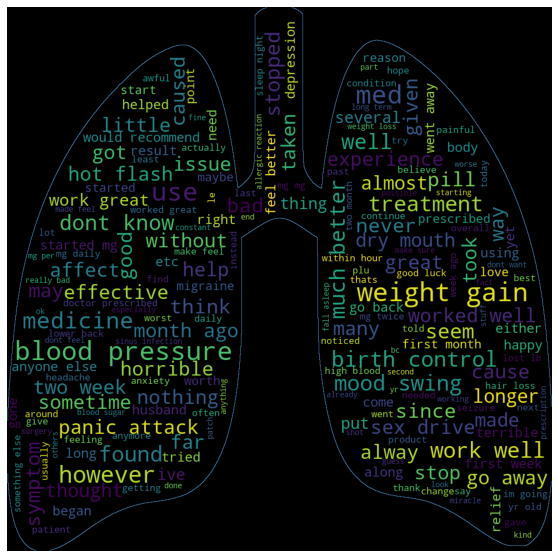

In [83]:
mask_colors=ImageColorGenerator(mask)
Review_wordcloud = ' '.join(df['Reviews'])
Q_wordcloud=WordCloud(mask=mask,stopwords=stopwords,
                    background_color='black',
                    width=mask.shape[1],
                    height=mask.shape[0],contour_width=1, contour_color='steelblue',
                   ).generate(Review_wordcloud)
fig = plt.figure(figsize = (10, 10))
plt.axis('off')
plt.imshow(Q_wordcloud)

In [53]:
#plt.imshow(Q_wordcloud.recolor(color_func=image_colors), interpolation="bilinear")


In [55]:
from nltk.corpus import stopwords
stop_words1=stopwords.words('english')

In [ ]:
stop_words1.extend()

In [56]:
df['Sides']= df['Sides'].apply(lambda x: " ".join(x.lower() for x in str(x).split()
                                                            if x not in stop_words1))

In [57]:
df['Sides']=df['Sides'].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words1))

In [58]:
from textblob import Word
df['Sides']= df['Sides'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

import re
pattern = r"((?<=^)|(?<= )).((?=$)|(?= ))"
df['Sides']= df['Sides'].apply(lambda x:(re.sub(pattern, '',x).strip()))

In [59]:
df['Sides'] = df['Sides'].str.replace('[^\w\s]','')
df['Sides'].head()

0    drowsiness dizziness  dry mouth nosethroat hea...
1    drowsiness dizziness  dry mouth nosethroat hea...
2    nausea  vomiting  headache  bloating  breast t...
3    nausea  vomiting  headache  bloating  breast t...
4    temporary burning stinging dryness nose runny ...
Name: Sides, dtype: object

In [ ]:
sw1=['may','occur']
stop_words1.extend(sw1)

In [78]:
from PIL import Image
mask1 = np.array(Image.open("/content/drive/MyDrive/circle2.jpg"))

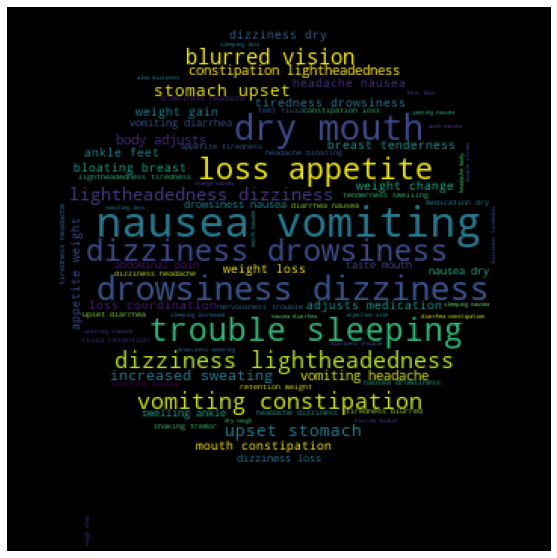

In [82]:
mask_colors=ImageColorGenerator(mask1)
Review_wordcloud1 = ' '.join(df['Sides'])
Q_wordcloud1=WordCloud(mask=mask1,stopwords=stop_words1,
                    background_color='black',
                    width=mask.shape[1],
                    height=mask.shape[0],
                   ).generate(Review_wordcloud1)
fig = plt.figure(figsize = (10, 10))
plt.axis('off')
plt.imshow(Q_wordcloud1)